# Practice Questions

Question Group: 22T1_MLP_W5_PP

Total # of questiosn: 6

## Que 1.

[1 point] Load the MNIST dataset (mnist_784, version=1) from openml. How many number of samples are there in the dataset?
[NAT]
**Ans:70000**

**Solution**

In [ ]:
import sys
import sklearn
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

X,y= fetch_openml('mnist_784',version=1,return_X_y=True) 
X = X.to_numpy()
y = y.to_numpy()
print(X.shape)


(70000, 784)


In [ ]:
np.random.seed(42)

## Que 2.
[2 point] Access the sample at the index 2022. 

    * What is the label of the sample?

    * What is the mean value of the sample?
    
    * How many zeros are there in the sample? 

Pack the answer in a tuple like (label,mean,num_zeros).

Options: <br>
1. (2,27.76,700) <br>
2. (1,0,680) <br>
3. (2,27.76,643) <br>
4. (2,30,128) <br>

**Ans: 3**

**Solution:**

In [ ]:
x = X[2022,:]
label = y[2022]
mean = np.round(np.mean(x),2)
maximum = np.max(x)
num_zeros = x.size - np.count_nonzero(x)
print("label:{0} \tmean:{1} \tmax:{2} \tnumber of zeros:{3}".format(label,mean,maximum,num_zeros))

label:2 	mean:27.76 	max:254.0 	number of zeros:643


## Que 3.

[4 points] Create a dataset by taking first 10000  images for training and next 2000 images for testing from the original dataset. Answer the following questions.

  * How many unique classes are there in the training set?
  * The number of training samples for the digit-6 are?
  * The number of training samples for the digit-9 are?
  * How many unique classes are there in the test set?
  * Which class has more number of test samples?

Pack the answers in a tuple like (2, 1000, 800, 5, 7).

Options: <br>
1. (5, 2000, 1100, 3, 1) <br>
2. (10, 1014, 978, 10, 1) <br>
3. (10, 1089, 978, 10, 2) <br>
4. (10, 1014, 988, 10, 3) <br>

**Ans: 2**

**Solution:**

In [ ]:
x_train = X[:10000]
x_test = X[10000:12000]
y_train = y[:10000].astype(np.int8)
y_test = y[10000:12000]
train_uniq = np.unique(y_train)
print('Unique classes in training set:',len(train_uniq))
test_uniq = np.unique(y_test)
print('Unique classes in testing set:',len(test_uniq))
count,bins = np.histogram(y_train,bins=10)
print(count)
print('Number of samples for dig-6 are:',count[6])
print('Number of samples for dig-9 are:',count[9])
count,bins = np.histogram(y_test.astype(np.int8),bins=10)
#print(count)
max_cls = np.argmax(count)
print('The class having more num of testing samples is: ',max_cls)

Unique classes in training set: 10
Unique classes in testing set: 10
[1001 1127  991 1032  980  863 1014 1070  944  978]
Number of samples for dig-6 are: 1014
Number of samples for dig-9 are: 978
The class having more num of testing samples is:  1


Unique classes in training set: 10
Unique classes in testing set: 10
[1001 1127  991 1032  980  863 1014 1070  944  978]
Number of samples for dig-6 are: 1014
Number of samples for dig-9 are: 978
The class having more num of testing samples is:  1

## Que 4.

[4 points] Consider the above modified training and testing sets with first 10000  images for training and next 2000 images for testing. 
   * Steps to be followed
      * Collect all digit-6 (Positive class) and digit-9 (Negative class) images and stack them properly as a single datamatrix. 
      *By convention, keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
      * Similarly, collect the respective labels and store it in a variable (Do sanity check).
      * Set the label values to 1 for positive classes and -1 for negative classes.
      * Load `from sklearn.utils import shuffle`
      *  Shuffle the datamatrix and labels. (Set `random_state` value to 1729). <br>

 what are the first three labels starting from the index 0?. Select from the following options,

Options: <br>
1. (1,-1,1) <br>
2. (1,1,-1) <br>
3. (1,-1,-1) <br>
4. (-1,-1,1) <br>
5. None of them

Ans: 3

**Solution:**

In [ ]:
# get the index of dig6 and dig_9
dig_6_idx = np.where(y_train == 6)[0]
dig_9_idx = np.where(y_train == 9)[0]
index = np.concatenate((dig_6_idx,dig_9_idx),axis=0)
# get all samples from the index array
x_train1 = x_train[index,:]
# create the label vector
y_train1 = np.concatenate((np.ones(len(dig_6_idx)),-1*np.ones(len(dig_9_idx))))

from sklearn.utils import shuffle
x_train1,y_train1 = shuffle(x_train1,y_train1,random_state=1729)
print('The first three labels starting from the index 0 are',y_train1[:3])

The first three labels starting from the index 0 are [ 1. -1. -1.]


## Que 5.

[4 Points] Instantiate a perceptron classifier that meets the following requirements
  * random_state = 1729
  * learning rate = 1
  * Train for 10 iterations (epoch)
  * Set shuffle the dataset for each epoch (iteration) as False.
  * Include the intercept (bias) term.
  * No regularization <br>

Fit the perceptron classifier on the training dataset. What is the value of $w$ for the 70th feature after 10 iterations? 

(Note: Indexing for coefficient starts from 0. Don't worry if it raises a convergence warning)

Options : <br>
1. 605.0
2. 608.0
3. 60.50
4. 6.08

**Ans: 1**




**Solution:**

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=1729,
                 eta0=1,max_iter=10,
                 shuffle=False,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None, 
                 warm_start=False)

In [ ]:
# ensure the clf parameters were set properly
print(clf.get_params())

{'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 10, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 1729, 'shuffle': False, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [ ]:
clf.fit(x_train1,y_train1)
print('The value of the weight for the 69th feature is: ',clf.coef_[0,69])

The value of the weight for the 69th feature is:  605.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


## Que 6.
[2 points] With respective to the above question and for the same settings.<br>
Which of the following is the sequence of bias (intercept) updates for the first 5 epochs?
 
 Options: 
 
 1. [-1.0, -4.0, -4.0, -6.0, -5.0]
 2. [-1.0, -6.0, -4.0, -6.0, -5.0]
 3. [-1.0, -6.0, -6.0, -6.0, -5.0]
 4. [-1.0, -4.0, -4.0, -5.0, -5.0]

**Ans:1**

**Solution:**

In [ ]:
clf = Perceptron(random_state=1729,
                 eta0=1,max_iter=1,
                 shuffle=False,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None, 
                 warm_start=False)

In [ ]:
updates = []
for i in range(5):
  clf.partial_fit(x_train1,y_train1,classes=np.unique(y_train1))
  updates.append(clf.intercept_[0])  
print('The sequence of bias updates: ',updates)

The sequence of bias updates:  [-1.0, -4.0, -4.0, -6.0, -5.0]


# Graded Questions

Question Group: 22T1_MLP_W5_PG

Total # of questiosn: 10

##(Common data for all the graded questions)

From the MNIST dataset, create a new dataset by taking first 10000  images for training and next 2000 images for testing. 
- Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix. 
- By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
- Similarly, collect the respective labels and store it in a variable (Do sanity check).
- Set the label values to 1 for positive class and -1 for negative class.
- Instantiate a perceptron classifier with the below parameters
  * random_state = 42
  * learning rate = 1
  * Train for 100 iterations (epoch)
  * Should shuffle the dataset for each epoch (iteration)
  * Include the intercept (bias) term.
  * No regularization <br>

Use the training set for fitting the perceptron model and use the test data to make the predictions. 
Answer the below questions.

## Que 1.
[2 points] Which of the following is a pair that gives the number of training samples for digit 5 and digit 3?

Options : <br>

1. (1014, 1032)
2. (980, 991)
3. (863, 1032) 
4. (863, 991)

**Ans: 3**


Solution:

## Que 2.
[2 points, (NAT)] Obtain confusion matrix for the test samples and the predicted samples. How many True Positives are there?

**Ans: 173**


   


## Que 3.
[2 points, (NAT)] From the confusion matrix, answer how many True Negatives are there?


**Ans: 190**

   


## Que 4.
[2 points, (NAT)] From the confusion matrix, answer how many False Negatives are there?

**Ans: 6**  


## Que 5.
[2 points, (NAT)] From the confusion matrix, answer how many False Positives are there?

**Ans: 12**
   


## Que 6.
[3 points, Multiple select] In the same model setup just change the  shuffle parameter to False, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. Which of the following statements are True based on your observations? 

Options: <br>

1. The accuracy value remains same while `shuffle = True` and `shuffle = False`.
2. The precision score value decreased after setting `shuffle = False`. 
3. The recall score value decreased after setting `shuffle = False`.
4. The accuracy value increased after setting `shuffle = False`.
5. The precision score value increased after setting `shuffle = False`. 
6. The recall score value increased after setting `shuffle = False`.
7. The accuracy value decreased after setting  `shuffle = False`.

      
**Ans: 3, 5, 7**


   


**Solution**

In [ ]:
x_train = X[:10000]
x_test = X[10000:12000]
y_train = y[:10000].astype(np.int8)
y_test = y[10000:12000].astype(np.int8)
train_uniq = np.unique(y_train)
print('Unique classes in training set:',len(train_uniq))
test_uniq = np.unique(y_test)
print('Unique classes in testing set:',len(test_uniq))
count,bins = np.histogram(y_train,bins=10)
print(count)
print('Number of samples for dig-5 are:',count[5])
print('Number of samples for dig-3 are:',count[3])
count,bins = np.histogram(y_test.astype(np.int8),bins=10)
#print(count)
max_cls = np.argmax(count)
print('The class having more num of testing samples is: ',max_cls)

# get the train index of dig 5 and dig_3
dig_5_idx = np.where(y_train == 5)[0]
dig_3_idx = np.where(y_train == 3)[0]
index = np.concatenate((dig_5_idx,dig_3_idx),axis=0)
# get all samples from the index array
x_train1 = x_train[index,:]
# create the label vector
y_train1 = np.concatenate((np.ones(len(dig_5_idx)),-1*np.ones(len(dig_3_idx))))

# get the test index of dig 5 and dig_3
dig_5_idx1 = np.where(y_test == 5)[0]
dig_3_idx1 = np.where(y_test == 3)[0]
index1 = np.concatenate((dig_5_idx1,dig_3_idx1),axis=0)
# get all samples from the index array
x_test1 = x_test[index1,:]
# create the label vector
y_test1 = np.concatenate((np.ones(len(dig_5_idx1)),-1*np.ones(len(dig_3_idx1))))

Unique classes in training set: 10
Unique classes in testing set: 10
[1001 1127  991 1032  980  863 1014 1070  944  978]
Number of samples for dig-5 are: 863
Number of samples for dig-3 are: 1032
The class having more num of testing samples is:  1


A 0.952755905511811
P 0.9664804469273743
R 0.9351351351351351


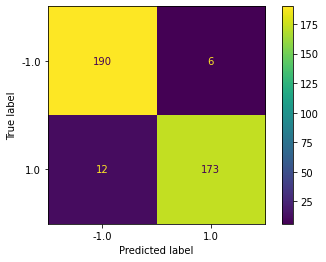

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score,recall_score
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=42,
                 eta0=1,max_iter=100,
                 shuffle=True,validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None,
                 warm_start=False)

clf.fit(x_train1,y_train1)

y_pred1 = clf.predict(x_test1)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1,values_format='.5g') 
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

plt.show()

A 0.5485564304461942
P 1.0
R 0.07027027027027027


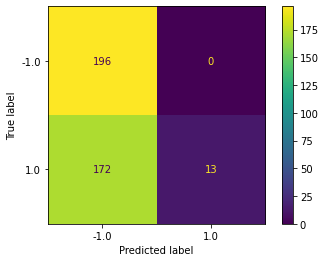

In [ ]:
clf = Perceptron(random_state=42,
                 eta0=1,max_iter=100,
                 shuffle=False,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None,
                 warm_start=False)
clf.fit(x_train1,y_train1)

y_pred1 = clf.predict(x_test1)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1,values_format='.5g') 
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))
plt.show()

## Que 7.

[4 points] Apply linear PCA and reduce the dimention of the datapoints to 10. Set `n_components=10`, `random_state=1` for PCA. Train perceptron classifier with same settings (`shuffle = True`) and use the trained model to make predictions on test data. Which of the following option gives the correct values inferred from confusion matrix?

Options: <br>

1. (TP: 119, TN: 93, FP: 77, FN: 92)
2. (TP: 119, TN: 93, FP: 92, FN: 77)
3. (TP: 93, TN: 119, FP: 92, FN: 77)
4. (TP: 93, TN: 119, FP: 77, FN: 92)

**Ans: 2**

## Que 8.

[3 points] Which of the following option gives the correct values for (accuracy_score, precision_score, recall_score)?

Options: <br>

1. (0.5564, 0.5470, 0.5027)
2. (0.5027, 0.5314, 0.5490)
3. (0.5180, 0.5381, 0.5370)
4. (0.5301, 0.5180, 0.4648)

**Ans: 1**

**Solution**

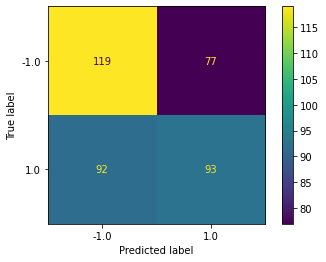

A 0.5564304461942258
P 0.5470588235294118
R 0.5027027027027027


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pca = PCA(n_components=10,random_state=1)

x_train1_reduced = pca.fit(x_train1).transform(x_train1)
x_test1_reduced = pca.fit(x_test1).transform(x_test1)
clf = Perceptron(random_state=42,
                 eta0=1,max_iter=100,
                 shuffle=True,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None, 
                 warm_start=False)
clf.fit(x_train1_reduced,y_train1)
y_pred1 = clf.predict(x_test1_reduced)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1,values_format='.5g') 
plt.show()
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

In [ ]:
x_train1.shape

(1895, 784)

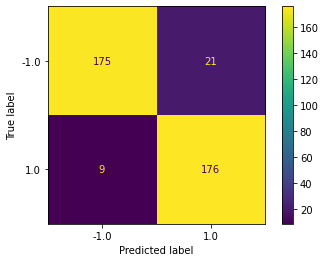

A 0.9212598425196851
P 0.8934010152284264
R 0.9513513513513514


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.base import clone
p = pca.fit(x_train1)
x_train1_resduced = p.transform(x_train1)
x_test1_reduced =  p.transform(x_test1)
clf1 = clone(clf)
clf1.fit(x_train1_reduced,y_train1)
y_pred1 = clf1.predict(x_test1_reduced)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1,values_format='.5g') 
plt.show()
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

In [ ]:
rng = np.random.RandomState(42)

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing perceptron, total=   0.0s


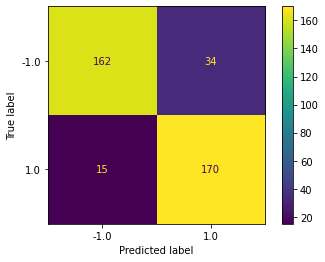

A 0.8713910761154856
P 0.8333333333333334
R 0.918918918918919


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=10,random_state=1)
# x_train1_reduced = pca.fit(x_train1).transform(x_train1)
# x_test1_reduced = pca.fit(x_test1).transform(x_test1)
clf = Perceptron(random_state=42,
                 eta0=1,max_iter=100,
                 shuffle=True,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty=None, 
                 warm_start=False)
pipe = make_pipeline(pca,clf,verbose=1)
pipe.fit(x_train1,y_train1)
y_pred1 = pipe.predict(x_test1)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test1,y_pred1,values_format='.5g') 
plt.show()
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

## Que 9.
[2 points]  In the same model setup after PCA reduction, now provide L2 regularization by setting `penalty = 'l2'` and regularization parameter value `alpha = 0.01`, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. 
Does regularization improved the accuracy, precision and recall score of the model?

Options: <br>

1. Yes
2. No


**Ans: 2**

**Solution:**

In [ ]:
clf = Perceptron(random_state=rng,
                 eta0=1,max_iter=100,
                 alpha = 0.01,
                 shuffle=True,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty='l2')

clf.fit(x_train1_reduced,y_train1)
y_pred1 = clf.predict(x_test1_reduced)
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

A 0.7480314960629921
P 0.7542857142857143
R 0.7135135135135136


## Que 10.
[2 points]  In the same model setup after PCA reduction, now provide L1 regularization by setting `penalty = 'l1'` and regularization parameter value `alpha = 0.01`, refit the classifier on training data, make predictions on test data and observe the accuracy, precision score and recall score. 
Does L1 regularization improve the accuracy,  precision and recall score compared to L2 regularization?

Options:
1. Yes
2. No

**Ans: 1**

**Solution:**

In [ ]:
clf = Perceptron(random_state=42,
                 eta0=1,max_iter=100,
                 alpha = 0.01,
                 shuffle=True,
                 validation_fraction=0.1,
                 fit_intercept=True,
                 penalty='l1')

clf.fit(x_train1_reduced,y_train1)
y_pred1 = clf.predict(x_test1_reduced)
print('A', accuracy_score(y_test1,y_pred1))
print('P', precision_score(y_test1,y_pred1))
print('R', recall_score(y_test1,y_pred1))

A 0.868766404199475
P 0.8688524590163934
R 0.8594594594594595
